In [1]:
import graphviz

class ANDNODE:
    def __init__(self,name):
        self.name = name
        self.nodes = []

    def __repr__(self):
        return str(self.nodes)

    def add(self, node):
        self.nodes.append(node)
        return
    
    def topdown(self, mat):
        for x in range(len(mat)):
            for y in range(len(mat[x])):
                if mat[x][y] == self:
                    mat[x].pop(y)
                    for node in self.nodes:
                        mat[x].append(node)
                        
        for node in self.nodes:
            node.topdown(mat)                       
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name + " &", shape='box')
        for node in self.nodes:
            graph.edge(self.name, node.name)
            node.print(graph)
        return graph     

class ORNODE:
    def __init__(self,name):
        self.name = name
        self.nodes = []

    def __repr__(self):
        return str(self.nodes)

    def add(self, node):
        self.nodes.append(node)
        return
    
    def topdown(self, mat):
        for x in range(len(mat)):
            for y in range(len(mat[x])):
                if mat[x][y] == self:
                    for node in self.nodes[:-1]:
                        mat.append(mat[x][:y] + [node] + mat[x][y+1:])
                    mat[x][y] = self.nodes[-1]
                        
        for node in self.nodes:
            node.topdown(mat)
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name + " >-", shape='diamond')
        for node in self.nodes:
            graph.edge(self.name, node.name)
            node.print(graph)
        return graph
    
class EVENT:
    def __init__(self,name):
        self.name = name
    
    def __repr__(self):
        return str(self.name)
        
    def topdown(self, mat):
        return mat
    
    def print(self, graph):
        graph.node(self.name, self.name, shape='circle')
        return graph
    
TOP = ANDNODE("TOP")
A = ORNODE("A")
B = ORNODE("B")
D = ANDNODE("D")
E1 = EVENT("1")
E2 = EVENT("2")
E3 = EVENT("3")
E4 = EVENT("4")
E5 = EVENT("5")

TOP.add(A)
TOP.add(B)
A.add(E1)
A.add(E2)
B.add(D)
B.add(E5)
D.add(E3)
D.add(E4)

print("Zusammensetzung TOP: ", TOP)
mat = [[TOP]]
mat = TOP.topdown(mat)
print(mat)
g = graphviz.Digraph()
TOP.print(g)

Zusammensetzung TOP:  [[1, 2], [[3, 4], 5]]
[[2, 5], [1, 5], [2, 3, 4], [1, 3, 4]]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

Zusammensetzung TOP:  [[1, 2], [[3, 4], 5]]
[[2, 5], [1, 5], [2, 3, 4], [1, 3, 4]]


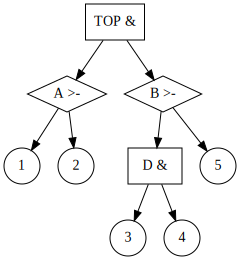

In [52]:
TOP = ANDNODE("TOP")
A = ORNODE("A")
B = ORNODE("B")
D = ANDNODE("D")
E1 = EVENT("1")
E2 = EVENT("2")
E3 = EVENT("3")
E4 = EVENT("4")
E5 = EVENT("5")

TOP.add(A)
TOP.add(B)
A.add(E1)
A.add(E2)
B.add(D)
B.add(E5)
D.add(E3)
D.add(E4)

print("Zusammensetzung TOP: ", TOP)
mat = [[TOP]]
mat = TOP.topdown(mat)
print(mat)
g = graphviz.Digraph()
TOP.print(g)

Zusammensetzung TOP:  [[1, 2], [[3, 4], 5]]
[[5], [2], [1], [4], [3]]


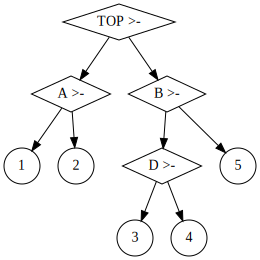

In [53]:
TOP = ORNODE("TOP")
A = ORNODE("A")
B = ORNODE("B")
D = ORNODE("D")
E1 = EVENT("1")
E2 = EVENT("2")
E3 = EVENT("3")
E4 = EVENT("4")
E5 = EVENT("5")

TOP.add(A)
TOP.add(B)
A.add(E1)
A.add(E2)
B.add(D)
B.add(E5)
D.add(E3)
D.add(E4)

print("Zusammensetzung TOP: ", TOP)
mat = [[TOP]]
mat = TOP.topdown(mat)
print(mat)
g = graphviz.Digraph()
TOP.print(g)

Zusammensetzung TOP:  [[1, 2], [[3, 4], 5]]
[[1, 2, 5, 3, 4]]


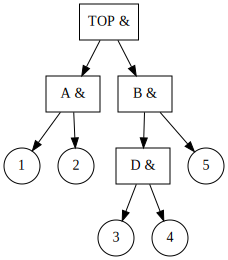

In [54]:
TOP = ANDNODE("TOP")
A = ANDNODE("A")
B = ANDNODE("B")
D = ANDNODE("D")
E1 = EVENT("1")
E2 = EVENT("2")
E3 = EVENT("3")
E4 = EVENT("4")
E5 = EVENT("5")

TOP.add(A)
TOP.add(B)
A.add(E1)
A.add(E2)
B.add(D)
B.add(E5)
D.add(E3)
D.add(E4)

print("Zusammensetzung TOP: ", TOP)
mat = [[TOP]]
mat = TOP.topdown(mat)
print(mat)
g = graphviz.Digraph()
TOP.print(g)

Zusammensetzung TOP:  [[[1, 2], [3, 4]], [[5, 1], [[[4, 5], 3], 2]]]
[[4, 5, 1, 3, 2], [2, 5, 1, 3, 2], [1, 5, 1, 3, 2], [3, 5, 1, 3, 2], [4, 5, 1, 2, 4, 5], [2, 5, 1, 2, 4, 5], [1, 5, 1, 2, 4, 5], [3, 5, 1, 2, 4, 5]]


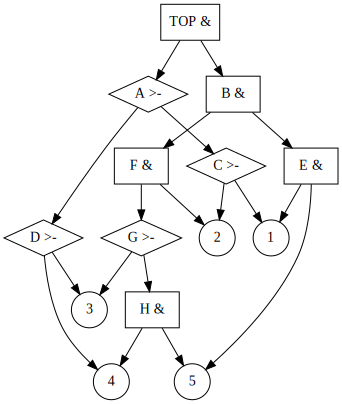

In [68]:
TOP = ANDNODE("TOP")
A = ORNODE("A")
B = ANDNODE("B")
C = ORNODE("C")
D = ORNODE("D")
E = ANDNODE("E")
F = ANDNODE("F")
G = ORNODE("G")
H = ANDNODE("H")
E1 = EVENT("1")
E2 = EVENT("2")
E3 = EVENT("3")
E4 = EVENT("4")
E5 = EVENT("5")

TOP.add(A)
TOP.add(B)
A.add(C)
A.add(D)
B.add(E)
B.add(F)
F.add(G)
G.add(H)
C.add(E1)
C.add(E2)
D.add(E3)
D.add(E4)
E.add(E5)
E.add(E1)
F.add(E2)
G.add(E3)
H.add(E4)
H.add(E5)

print("Zusammensetzung TOP: ", TOP)
mat = [[TOP]]
mat = TOP.topdown(mat)
print(mat)
g = graphviz.Digraph()
TOP.print(g)